In [3]:
%run funcs.ipynb
%run Proj_org.ipynb

C:\Users\robin\AppData\Local\Temp\ipykernel_10812\3072187195.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[col] = array.apply(lambda x : col in x)
C:\Users\robin\AppData\Local\Temp\ipykernel_10812\3072187195.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[col] = array.apply(lambda x : col in x)
C:\Users\robin\AppData\Local\Temp\ipykernel_10812\3072187195.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Cons

end


In [2]:
%run funcs.ipynb

In [6]:
#patch_sklearn(global_patch=True)

# Classification

In [7]:
dt = DecisionTreeClassifier()

In [8]:
X_train_copy, y_train_copy = X_train_com.copy(), y_train_com.copy()

In [9]:
idx = y_train_copy.value_counts()[y_train_copy.value_counts() < 6].index

In [10]:
X_train_copy = X_train_copy[y_train_copy.apply(lambda x : x not in idx)]

In [11]:
y_train_copy = y_train_copy[y_train_copy.apply(lambda x : x not in idx)]

In [12]:
X_train_copy

,MainBranch,RemoteWork,EdLevel,YearsCode,YearsCodePro,OrgSize,PurchaseInfluence,Country,Currency,CompTotal,...,"I have autism / an autism spectrum disorder (e.g. Asperger's, etc.)",Innersource initiative,Developer portal or other central places to find tools/services,DevOps function,None of these,Continuous integration (CI) and (more often) continuous delivery,Automated testing,Microservices,Observability tools,ConvertedCompYearly
21315,0,1.0,1.0,33.0,11.0,1.0,0.0,151,112,1653,...,0,0,0,0,0,0,0,0,0,87000.0
32655,0,0.0,2.0,15.0,9.0,5.0,2.0,76,34,543,...,0,0,0,0,0,0,0,0,0,60144.0
33781,0,2.0,2.0,1.0,44.0,0.0,1.0,88,77,1275,...,0,0,1,0,0,0,0,0,0,30108.0
14876,0,2.0,1.0,47.0,22.0,7.0,2.0,101,82,2536,...,0,0,1,1,0,1,1,1,1,65334.0
22929,0,2.0,2.0,1.0,22.0,7.0,2.0,101,82,2615,...,0,0,1,1,0,1,1,1,0,83483.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16850,0,1.0,1.0,49.0,44.0,6.0,2.0,144,106,1146,...,0,1,1,1,0,1,1,1,1,30060.0
6265,0,2.0,2.0,20.0,17.0,5.0,2.0,96,34,586,...,0,0,1,0,0,1,1,0,0,66156.0
11284,0,1.0,1.0,31.0,21.0,3.0,0.0,151,112,2282,...,0,0,1,1,0,1,1,0,0,258000.0
860,0,2.0,2.0,3.0,48.0,4.0,2.0,46,34,1418,...,0,0,0,0,0,1,1,0,1,66119.0


In [13]:
idx = y_train_copy.value_counts()[y_train_copy.value_counts() < 300].index

In [14]:
idx

Int64Index([ 19,  22,  25,  21,  30,  23,  24,  26,  28,  27,  32,  40,  35,
             38,  29,  45,  50,  90,  33,  31,  39,  77,  36,  64,  41,  70,
             61,  76, 144,  52,  68,  47,  49,  48,  53,  85,  83, 128, 103,
             96,  84,  58,  54,  71,  56,  34,  43,  55,  93,  98,  57,  78,
             81, 125,  37,  75, 180,  60,  59, 132,  80, 106,  94, 120,  62,
             42, 150, 141, 114, 102, 100,  44, 192,  95, 700, 168,  79, 108,
             91, 122, 750,  73, 600, 156,  63],
           dtype='int64')

In [15]:
classes = {}
for i in idx:
    classes[i] = 350


In [16]:
sm = SMOTE(sampling_strategy=classes ,random_state=42)

In [17]:
X_train_copy, y_train_copy = sm.fit_resample(X_train_copy, y_train_copy)

In [18]:
X_t_train, X_val, y_t_train, y_val = train_test_split(X_train_copy, y_train_copy, test_size=0.2)

In [19]:
y_train_copy.value_counts()

5      2017
6      2014
4      1957
7      1861
2      1828
       ... 
49      350
108     350
700     350
77      350
141     350
Name: ConvertedCompYearly, Length: 104, dtype: int64

In [20]:
param_search = {
    "criterion" : ["gini", "entropy", "log_loss"],
    "max_depth" : np.append(np.arange(1, 500, 50), None),
    "min_samples_split" : np.arange(2, 200, 20),
    "min_samples_leaf" : np.arange(1, 200, 20),
    "max_leaf_nodes" : np.append(np.arange(5, 200, 20), None)
}

In [21]:
bycs = BayesSearchCV(dt, param_search, n_iter = 40, n_jobs = -1)

In [22]:
start = time.time()
count = 0

bycs.fit(X_t_train, y_t_train)

end = time.time()
print(end - start)

244.3310523033142


In [23]:
dt_model = bycs.best_estimator_

In [24]:
start = time.time()

dt_model.fit(X_t_train, y_t_train)

end = time.time()
print(end - start)

4.431928873062134


In [25]:
#dt_model = convert(dt_model, "pytorch")
#dt_model.to("cuda")

In [26]:
start = time.time()

preds_dt = dt_model.predict(X_val)

end = time.time()
print(end - start)

0.03000354766845703


In [27]:
accuracy_score(y_val, preds_dt)

0.9996194824961948

In [28]:
param_search_svm = {
    "C" : np.linspace(1, 3, 6),
    "kernel" : ["linear", "poly", "rbf", "sigmoid"],
    "degree" : np.arange(3, 22, 3),
    "probability" : [True],
}

In [29]:
svm = SVC(C=param_search_svm["C"][0], kernel=param_search_svm["kernel"][0], degree=param_search_svm["degree"][0], probability=True)

In [30]:
start = time.time()


svm.fit(X_t_train, y_t_train)

end = time.time()
print(end - start)

424.1065583229065


In [31]:
#svm_model = convert(svm, "pytorch")
#svm_model.to("cuda")

In [32]:
preds_svm = svm.predict(X_val)

In [33]:
accuracy_score(y_val, preds_svm)

0.9995243531202436

In [34]:
param_search = {
    "n_neighbors" : np.arange(5, 50, 10),
    "weights" : ["uniform", "distance"],
    "leaf_size" : np.arange(30, 100, 20),
    "metric" : [distance.cosine, distance.correlation, distance.chebyshev, distance_metrics()["euclidean"]]
}

In [35]:
knn = KNeighborsClassifier(n_jobs=-1)

In [36]:
knn.fit(X_t_train, y_t_train)

KNeighborsClassifier(n_jobs=-1)

In [37]:
np.arange(0,10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [38]:
X_val.iloc[np.arange(0,100)]

,MainBranch,RemoteWork,EdLevel,YearsCode,YearsCodePro,OrgSize,PurchaseInfluence,Country,Currency,CompTotal,...,"I have autism / an autism spectrum disorder (e.g. Asperger's, etc.)",Innersource initiative,Developer portal or other central places to find tools/services,DevOps function,None of these,Continuous integration (CI) and (more often) continuous delivery,Automated testing,Microservices,Observability tools,ConvertedCompYearly
4581,0,2.000000,6.000000,1.000000,47.000000,1.000000,1.000000,66,34,981,...,0,0,0,0,1,0,0,0,0,27727.0
11838,0,1.000000,7.000000,21.000000,12.000000,4.000000,0.000000,149,36,1472,...,0,0,0,1,0,1,1,0,1,84807.0
5950,1,1.000000,1.000000,5.000000,48.000000,3.000000,0.000000,151,112,1957,...,0,0,0,0,1,0,0,0,0,135000.0
9948,0,2.000000,2.000000,5.000000,48.000000,5.000000,2.000000,101,112,1496,...,0,0,0,0,0,0,0,0,0,840000.0
37593,0,1.807711,6.000000,39.116150,18.346509,4.615422,0.807711,19,34,1251,...,0,0,0,0,0,1,0,0,0,614268.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26840,0,1.000000,0.580219,2.679123,46.000000,0.419781,1.160438,151,112,2312,...,0,0,0,0,0,0,0,0,0,280000.0
40500,0,2.000000,1.249129,35.785714,36.736934,6.003484,0.498258,103,34,1398,...,0,0,1,1,0,1,1,1,0,767832.0
22276,0,1.000000,1.000000,24.000000,1.000000,2.000000,2.000000,151,112,2109,...,1,0,0,0,0,0,0,0,0,175000.0
19999,0,2.000000,6.000000,46.000000,11.000000,3.000000,2.000000,66,34,1083,...,0,0,0,0,0,0,0,0,0,37325.0


In [39]:
preds_knn = knn.predict(X_val.iloc[np.arange(0,400)])

In [40]:
accuracy_score(preds_knn, y_val.iloc[np.arange(0,400)])

0.995

In [41]:
mlpc = MLPClassifier((128 , 64, 32, 16, 32, 104))

In [42]:
len(y_val.unique())

104

In [43]:
mlpc.fit(X_t_train, y_t_train)

MLPClassifier(hidden_layer_sizes=(128, 64, 32, 16, 32, 104))

In [44]:
preds_mlpc = mlpc.predict(X_val)

In [45]:
accuracy_score(y_val, preds_mlpc)

0.09170471841704718

# Regression

In [1]:
%run funcs.ipynb

In [2]:
X_train_com_r, X_test_com_r, y_train_com_r, y_test_com_r = \
pd.read_csv("X_train_r"), pd.read_csv("X_test_r"), pd.read_csv("y_train_r"), pd.read_csv("y_test_r"),

In [3]:
X_t_train_r, X_val_r, y_t_train_r, y_val_r  = train_test_split(X_train_com_r, y_train_com_r, test_size=0.2)

,MainBranch,RemoteWork,EdLevel,YearsCode,YearsCodePro,OrgSize,PurchaseInfluence,Country,Currency,CompTotal,...,"I have autism / an autism spectrum disorder (e.g. Asperger's, etc.)",Innersource initiative,Developer portal or other central places to find tools/services,DevOps function,None of these,Continuous integration (CI) and (more often) continuous delivery,Automated testing,Microservices,Observability tools,ConvertedCompYearly
22499,0,1.0,2.0,46.0,44.0,0.0,0.0,151,112,2171,...,0,0,0,0,0,0,0,0,0,200000.0
24524,0,1.0,1.0,12.0,7.0,0.0,1.0,151,112,2270,...,0,0,1,1,0,1,1,1,1,250000.0
23250,0,2.0,1.0,11.0,50.0,3.0,2.0,151,112,1912,...,0,0,0,0,0,0,0,0,0,125000.0
23675,0,1.0,1.0,5.0,3.0,0.0,1.0,151,112,1836,...,0,0,1,1,0,1,1,1,0,113000.0
1089,0,0.0,1.0,17.0,6.0,0.0,1.0,149,36,1146,...,0,0,1,1,0,1,0,1,0,50256.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25174,0,1.0,2.0,48.0,33.0,2.0,2.0,124,34,472,...,0,1,1,1,0,1,1,1,1,51192.0
17837,0,2.0,1.0,31.0,23.0,5.0,0.0,96,34,1547,...,0,0,0,1,0,1,1,0,0,959796.0
11681,0,2.0,1.0,8.0,49.0,0.0,1.0,149,36,1636,...,0,0,0,1,0,1,1,1,1,106793.0
14482,0,2.0,6.0,44.0,44.0,0.0,2.0,48,34,567,...,0,0,1,1,0,1,0,1,1,63984.0


In [7]:
dtR = DecisionTreeRegressor()

In [8]:
dtR.fit(X_t_train_r, y_t_train_r)

DecisionTreeRegressor()

In [9]:
preds_dtR = dtR.predict(X_val_r)

In [10]:
preds_dtR

array([ 94230., 115000.,  67186., ...,  35832.,  64000.,  66026.])

In [11]:
y_val_r

,ConvertedCompYearly
7015,94230.0
8777,115000.0
11895,67186.0
10311,1547664.0
1253,45048.0
...,...
123,51504.0
22366,525557.0
18212,35832.0
24611,64000.0


In [12]:
preds_dtR

array([ 94230., 115000.,  67186., ...,  35832.,  64000.,  66026.])

In [13]:
y_val_r.to_numpy().reshape(-1)

array([ 94230., 115000.,  67186., ...,  35832.,  64000.,  66070.])

In [14]:
mean_squared_error(y_val_r.to_numpy().reshape(-1), preds_dtR)

8457914704.115249

In [15]:
r2_score(y_val_r, preds_dtR)

0.9812396713383323

In [16]:
y_val_r.to_numpy().reshape(-1)

array([ 94230., 115000.,  67186., ...,  35832.,  64000.,  66070.])

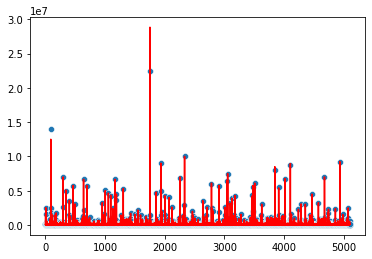

In [17]:
plt.Figure(dpi=200)
sns.scatterplot(x=range(len(y_val_r)), y=y_val_r.to_numpy().reshape(-1))
sns.lineplot(x=range(len(y_val_r)), y=preds_dtR, color="r")
plt.show()

In [18]:
lr = LinearRegression()

In [19]:
X_t_train_r.values

array([[0.00000e+00, 2.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        1.00000e+00, 8.35500e+04],
       [0.00000e+00, 1.00000e+00, 2.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 6.63720e+04],
       [0.00000e+00, 1.00000e+00, 2.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.91959e+05],
       ...,
       [0.00000e+00, 2.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 7.47600e+03],
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 5.44940e+04],
       [0.00000e+00, 1.00000e+00, 6.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 1.74480e+04]])

In [20]:
y_t_train_r.values.reshape(-1)

array([ 83550.,  66372., 191959., ...,   7476.,  54494.,  17448.])

In [21]:
lr.fit(X_t_train_r.values, y_t_train_r.values.reshape(-1))

LinearRegression()

In [22]:
preds_lR = lr.predict(X_val_r.values)

In [23]:
preds_lR

array([ 94230., 115000.,  67186., ...,  35832.,  64000.,  66070.])

In [24]:
mean_squared_error(y_val_r, preds_lR)

9.131150204038773e-19

In [25]:
r2_score(y_val_r, preds_lR)

1.0

In [26]:
y_val_r.to_numpy().reshape(-1)

array([ 94230., 115000.,  67186., ...,  35832.,  64000.,  66070.])

In [27]:
preds_lR

array([ 94230., 115000.,  67186., ...,  35832.,  64000.,  66070.])

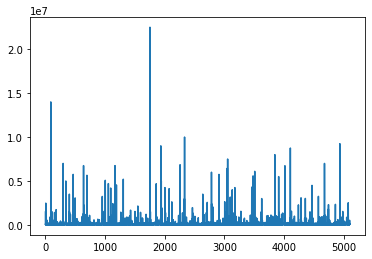

In [28]:
plt.Figure(dpi=200)
plt.plot(range(len(y_val_r)),preds_lR.reshape(-1))
plt.show()

In [18]:
svr = SVR(kernel="linear", C=1.4)

In [12]:
X_t_train_r.to_numpy()[0:100]

array([[0.0000e+00, 1.0000e+00, 2.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        2.0000e+05],
       [0.0000e+00, 1.0000e+00, 1.0000e+00, ..., 1.0000e+00, 1.0000e+00,
        2.5000e+05],
       [0.0000e+00, 2.0000e+00, 1.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        1.2500e+05],
       ...,
       [0.0000e+00, 1.0000e+00, 1.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        5.9050e+04],
       [0.0000e+00, 2.0000e+00, 2.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        5.2895e+04],
       [0.0000e+00, 2.0000e+00, 2.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        6.6119e+04]])

In [15]:
x = X_t_train_r.to_numpy()[0:130]

In [16]:
y = y_t_train_r.to_numpy().reshape(-1)[0:130]

In [33]:
svr.fit(x, y)

SVR(C=1.4, kernel='linear')

In [29]:
preds_svr = svr.predict(X_val_r.to_numpy())

,ConvertedCompYearly
count,5.102000e+03
mean,1.620189e+05
std,5.947645e+05
min,1.000000e+00
25%,3.732500e+04
50%,6.931800e+04
75%,1.200000e+05
max,1.300000e+07


In [30]:
mean_squared_error(y_val_r, preds_svr)

0.00933877343520296

In [32]:
r2_score(y_val_r, preds_svr)

0.9999999999999736

mlpr = MLPRegressor((200, 100, 50, 10, 50, 100, 200))

mlpr.fit(X_train_r, y_train_r)

In [75]:
#mlpr.score(X_train_r, y_train_r)

# Clustering

In [2]:
km = KMeans(n_clusters=10)

In [4]:
X_t_train = pd.read_csv("X_train")

In [5]:
km.fit(X_t_train)

KMeans(n_clusters=10)

In [7]:
sses = []
for i in range(1,20):
    km = KMeans(n_clusters=i)
    km.fit(X_t_train)
    sses.append(km.inertia_)
    print(i)
    


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [12]:
sses = []
for i in range(19,40):
    km = KMeans(n_clusters=i)
    km.fit(X_t_train)
    sses.append(km.inertia_)
    print(i)

19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39


In [16]:
sses = []
for i in range(39,80):
    km = KMeans(n_clusters=i)
    km.fit(X_t_train)
    sses.append(km.inertia_)
    print(i)

39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79


In [20]:
sses = []
for i in range(79,200):
    km = KMeans(n_clusters=i)
    km.fit(X_t_train)
    sses.append(km.inertia_)
    print(i)

79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


In [26]:
sses[10]

123540666906.11302

In [22]:
len(sses)

121

In [25]:
np.argmin(sses)

10

In [11]:
sses

[1.8020763694133788e+16,
 8105745616586971.0,
 3228599566503269.5,
 2127096254221563.8,
 1374895958778310.0,
 943196143875658.0,
 692374420086677.2,
 539542874100364.0,
 423681880430401.06,
 340336183986132.5,
 266429881712616.56,
 219666498844904.03,
 181272069093512.56,
 160289546403899.2,
 144221887705190.25,
 130423522152995.4,
 114549413196801.84,
 104885004642881.88,
 85653387261688.2]

In [79]:
km.inertia_

269700321063989.53

In [77]:
km.inertia_

269700321063989.53

In [35]:
lofm = LocalOutlierFactor()
lof = LocalOutlierFactor(novelty=True)

In [37]:
lof.fit(X_t_train_r)

LocalOutlierFactor(novelty=True)

In [ ]:
lof.fit(y_t_train_r)

In [39]:
preds = lof.predict(X_val_r)

c:\Users\robin\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


In [40]:
pd.Series(preds).value_counts()/len(preds)

 1    0.825167
-1    0.174833
dtype: float64

In [51]:
X_val_r.iloc[(preds == 1)]

,MainBranch,RemoteWork,EdLevel,YearsCode,YearsCodePro,OrgSize,PurchaseInfluence,Country,Currency,CompTotal,...,"I have autism / an autism spectrum disorder (e.g. Asperger's, etc.)",Innersource initiative,Developer portal or other central places to find tools/services,DevOps function,None of these,Continuous integration (CI) and (more often) continuous delivery,Automated testing,Microservices,Observability tools,ConvertedCompYearly
11930,0,1.0,1.0,4.0,2.0,6.0,0.0,151,112,2109,...,0,1,1,1,0,1,1,1,1,175000.0
2395,0,1.0,1.0,5.0,5.0,2.0,1.0,151,112,1795,...,0,0,0,1,0,0,0,0,0,106000.0
7127,0,1.0,7.0,49.0,44.0,4.0,2.0,48,34,1123,...,0,0,1,0,0,0,1,1,0,486300.0
7088,0,2.0,3.0,14.0,1.0,3.0,1.0,133,99,1357,...,0,0,0,0,0,1,1,0,0,68628.0
24811,0,1.0,7.0,0.0,0.0,5.0,1.0,149,36,1146,...,0,0,0,0,0,1,0,0,0,50256.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4542,0,2.0,2.0,48.0,48.0,0.0,1.0,46,34,1678,...,0,0,0,0,0,0,0,0,0,95979.0
14590,0,1.0,7.0,6.0,6.0,0.0,2.0,151,112,2046,...,0,0,0,1,0,1,0,0,0,155000.0
13255,0,2.0,1.0,10.0,3.0,3.0,0.0,96,34,1579,...,0,0,0,0,0,0,0,0,0,84170.0
16006,0,1.0,2.0,6.0,1.0,3.0,1.0,66,34,1496,...,0,0,0,1,0,1,1,1,1,74651.0


In [41]:
lof.score_samples(X_val_r)

c:\Users\robin\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


array([-1.0329405 , -1.17247752, -3.89001856, ..., -0.98208878,
       -1.27232398, -1.05947718])

# Plots

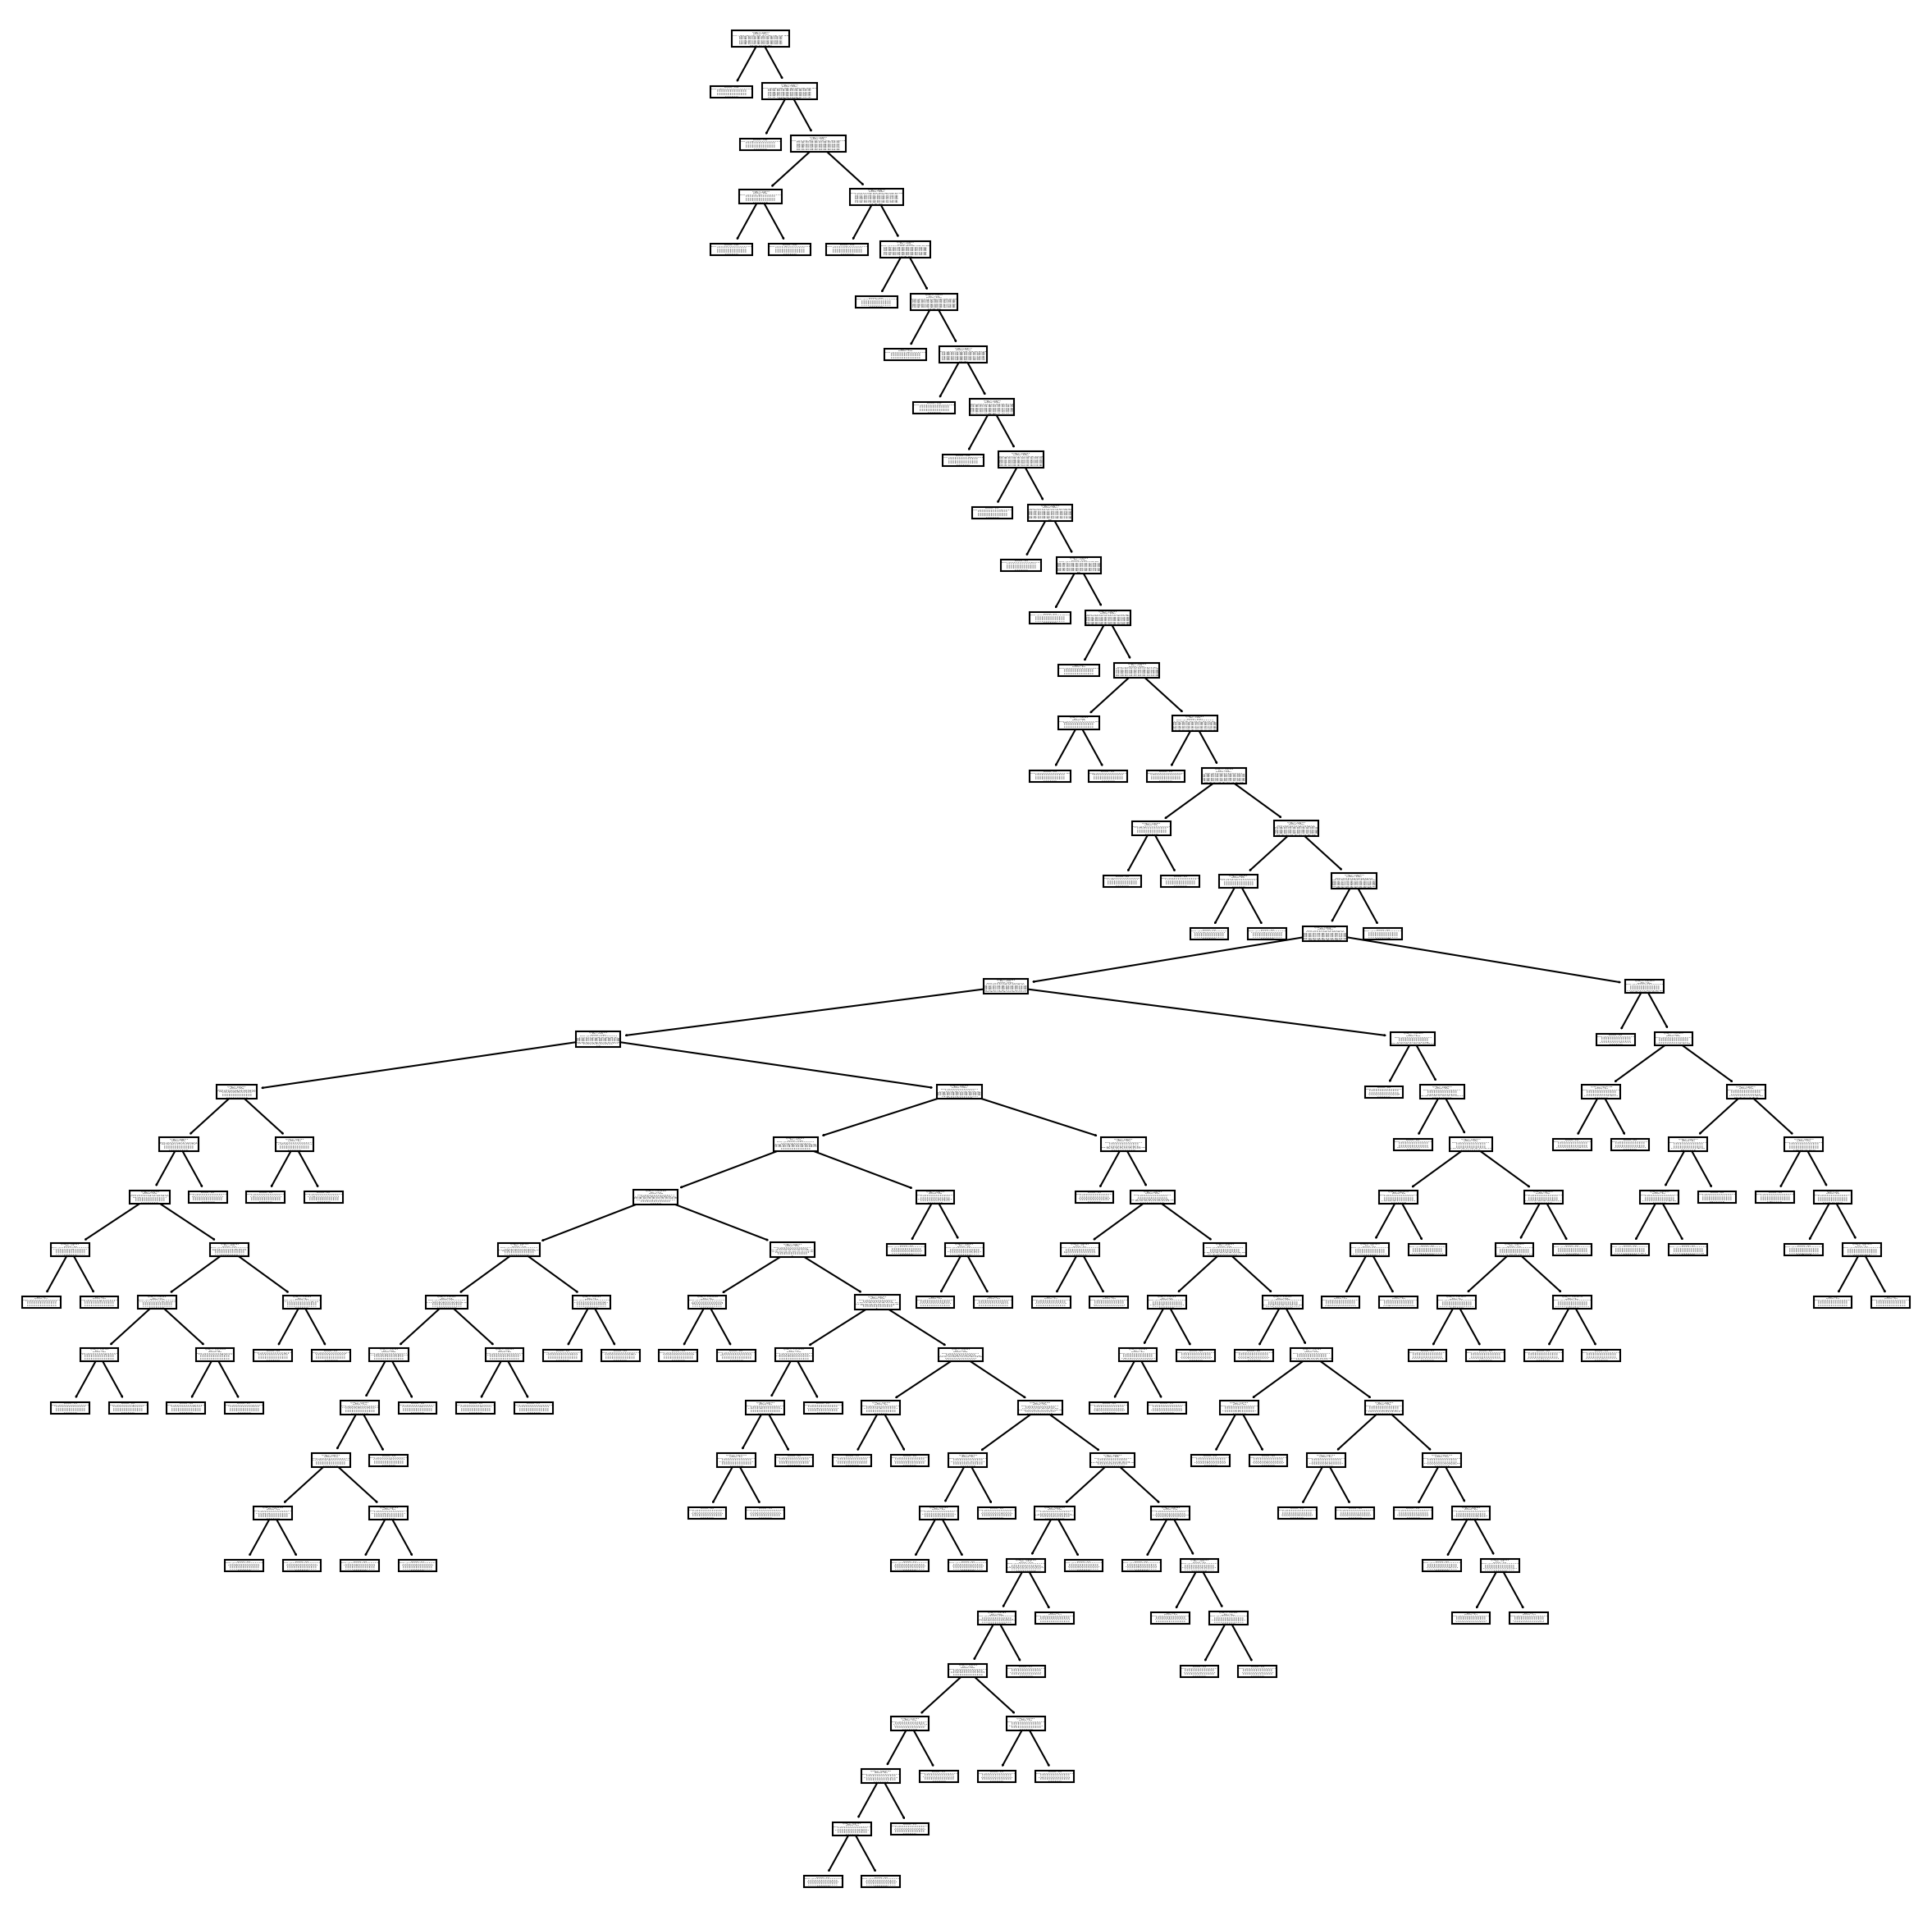

In [176]:
plt.figure(dpi=150, figsize=(20,20))
plot_tree(dt_model)
plt.show()

# Deep Learning with Keras

In [ ]:
model = keras.Sequential()
# Add an Embedding layer expecting input vocab of size 1000, and
# output embedding dimension of size 64.
model.add(layers.Embedding(input_dim=100, output_dim=64))

# Add a LSTM layer with 128 internal units.
model.add(layers.LSTM(128))

# Add a Dense layer with 10 units.
model.add(layers.Dense(10))